# This notebook shows the calibrated FUSE output and compares with unregulated streamflow observations

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
import numpy as np
import pandas as pd

jtplot.style(theme='grade3')
plt.rcParams['figure.figsize'] = (12, 5)

In [2]:
# User-Supplied
file1 = '/glade/p/work/manab/ff/islandpark/output/exp1/001_222_runs_best.nc'
file2 = '/glade/p/work/manab/ff/islandpark/output/exp2/001_222_runs_best.nc'
file3 = '/glade/p/work/manab/ff/islandpark/output/exp3/001_222_runs_best.nc'
file4 = '/glade/p/work/manab/ff/islandpark/output/exp4/001_222_runs_best.nc'
file5 = '/glade/p/work/manab/ff/islandpark/output/exp5/001_222_runs_best.nc'
file6 = '/glade/p/work/manab/ff/islandpark/output/exp6/001_222_runs_best.nc'
forc = '/glade/p/work/manab/ff/islandpark/inputnew/001.nc'   #Forcing file

out1 = xr.open_dataset(file1)
out2 = xr.open_dataset(file2)
out3 = xr.open_dataset(file3)
out4 = xr.open_dataset(file4)
out5 = xr.open_dataset(file5)
out6 = xr.open_dataset(file6)
forc = xr.open_dataset(forc)
print("All variables available in the Output file: ", list(out2.variables.keys()))

# For plotting
starttime = '2011-10-01'
endtime = '2013-09-30'

All variables available in the Output file:  ['ppt', 'pet', 'obsq', 'tens_1', 'tens_1a', 'tens_1b', 'free_1', 'watr_1', 'tens_2', 'free_2', 'free_2a', 'free_2b', 'watr_2', 'swe_tot', 'swe_z01', 'swe_z02', 'swe_z03', 'swe_z04', 'swe_z05', 'swe_z06', 'swe_z07', 'evap_1', 'evap_2', 'q_instnt', 'q_routed', 'time', 'latitude', 'longitude', 'param_set']


### FUSE is simulated for 1970-01-01 - 2016-12-31 and evaluated for 1980-10-01 - 2014-09-31. The following plot shows daily flow for an example period

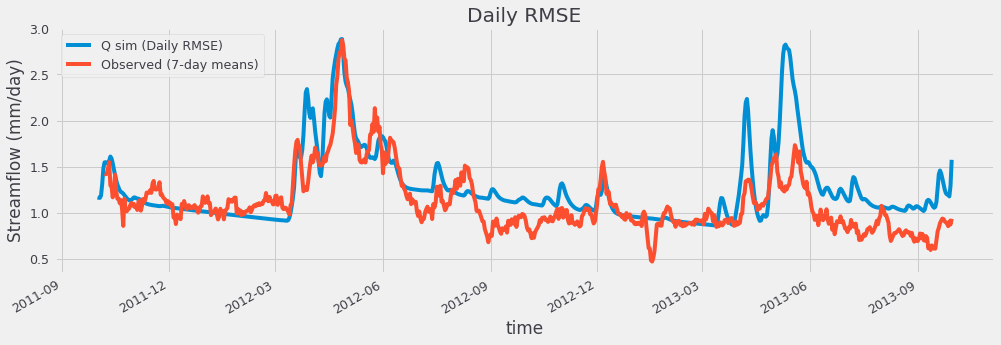

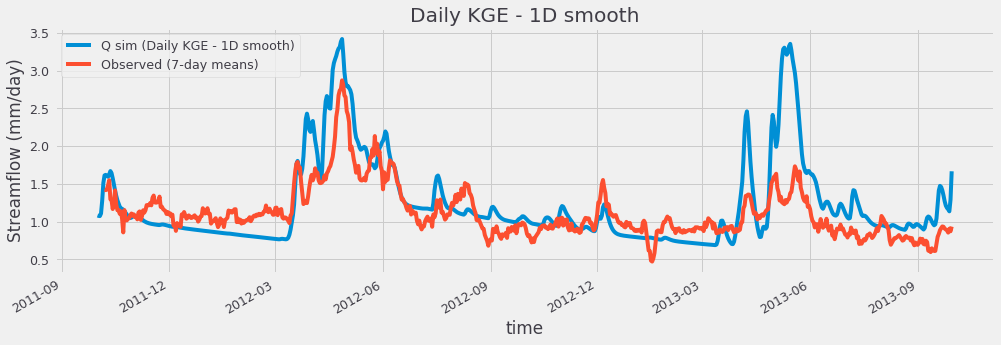

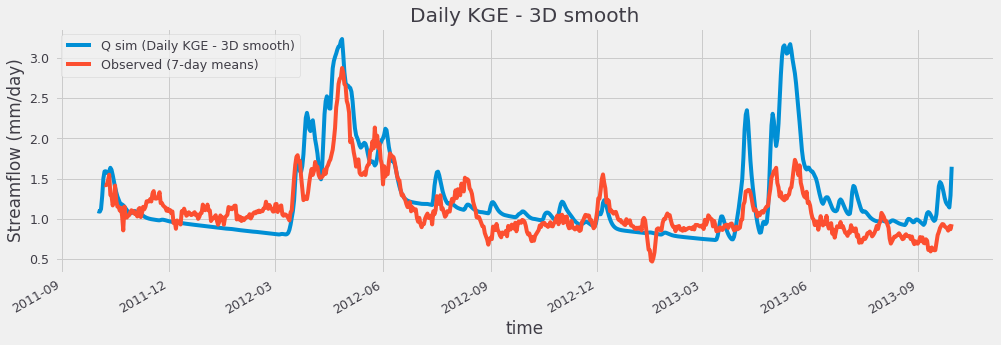

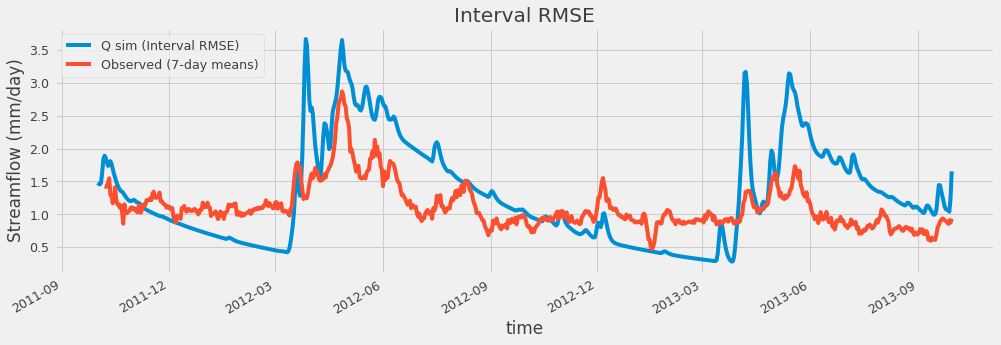

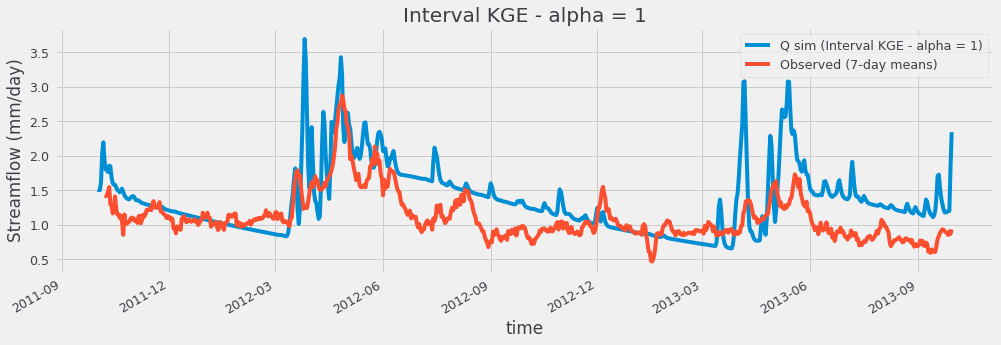

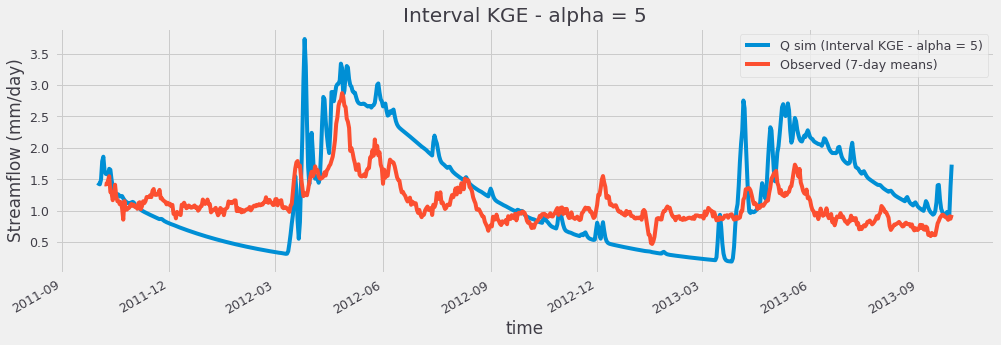

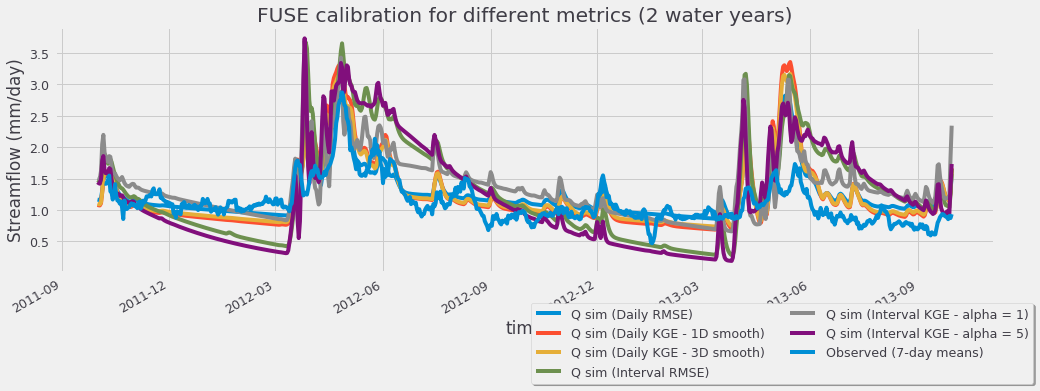

In [22]:
plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
out1['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Daily RMSE)')
out1['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
plt.ylabel('Streamflow (mm/day)')
plt.title('Daily RMSE')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
out2['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Daily KGE - 1D smooth)')
out1['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
plt.ylabel('Streamflow (mm/day)')
plt.title('Daily KGE - 1D smooth')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
out3['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Daily KGE - 3D smooth)')
out1['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
plt.ylabel('Streamflow (mm/day)')
plt.title('Daily KGE - 3D smooth')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
out4['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Interval RMSE)')
out1['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
plt.ylabel('Streamflow (mm/day)')
plt.title('Interval RMSE')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
out5['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Interval KGE - alpha = 1)')
out1['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
plt.ylabel('Streamflow (mm/day)')
plt.title('Interval KGE - alpha = 1')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
out6['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Interval KGE - alpha = 5)')
out1['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
plt.ylabel('Streamflow (mm/day)')
plt.title('Interval KGE - alpha = 5')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.style.use('fivethirtyeight')
out1['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Daily RMSE)')
out2['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Daily KGE - 1D smooth)')
out3['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Daily KGE - 3D smooth)')
out4['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Interval RMSE)')
out5['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Interval KGE - alpha = 1)')
out6['q_routed'].loc[starttime: endtime].plot(label = 'Q sim (Interval KGE - alpha = 5)')

out1['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
plt.ylabel('Streamflow (mm/day)')
plt.title('FUSE calibration for different metrics (2 water years)')
plt.legend(loc='upper left', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=2)
plt.show()

# Flow-duration curves

In [6]:
def plotncvar(ncdat, ncvar, xlabel, ylabel):
    plt.figure(figsize=(15, 5))
    ncdat[ncvar].plot()
    plt.title(' ')
    plt.ylabel(xlabel, fontsize = 16)
    plt.xlabel(ylabel, fontsize = 16)
    plt.legend()
    plt.show()

# FUSE output

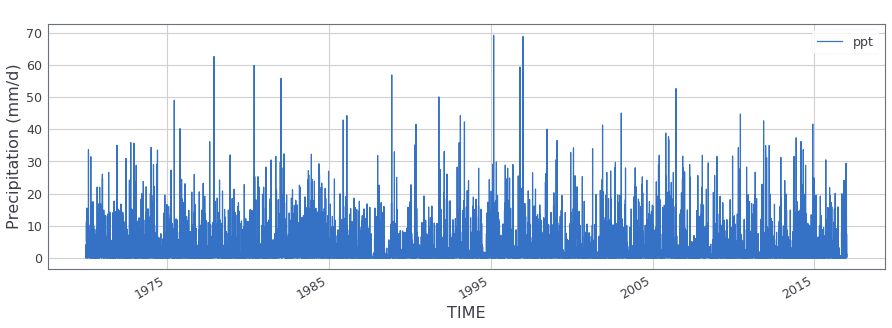

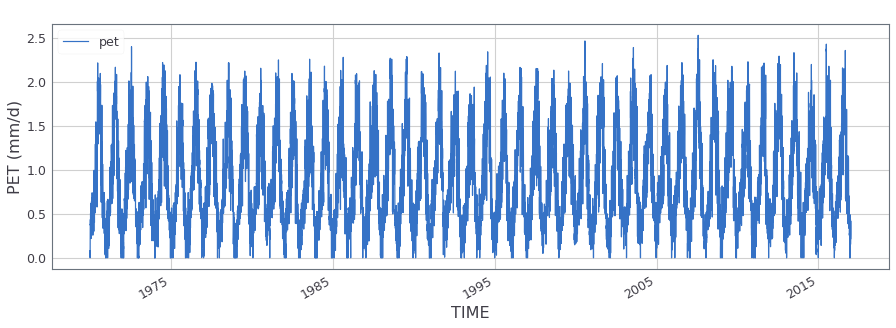

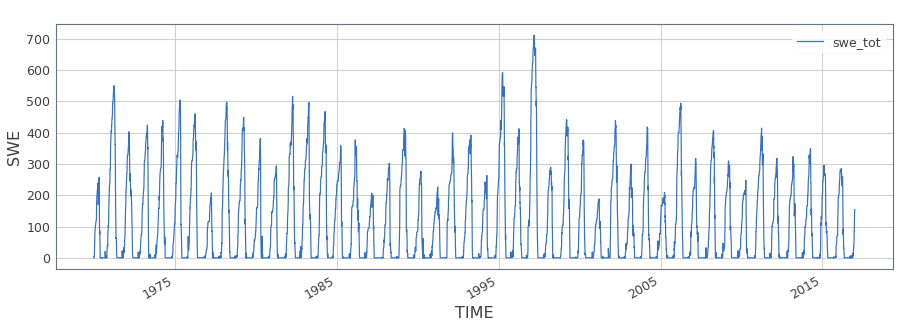

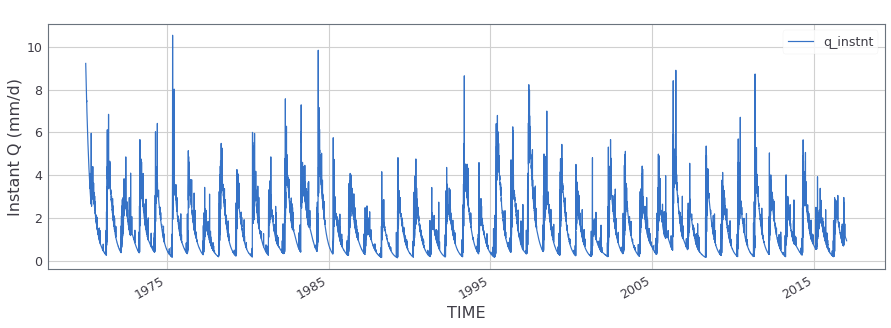

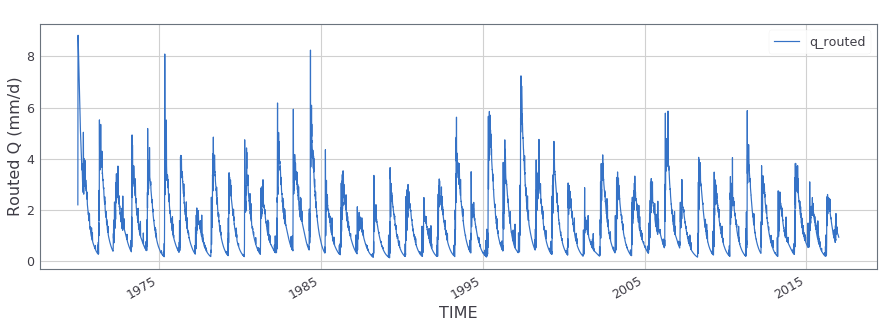

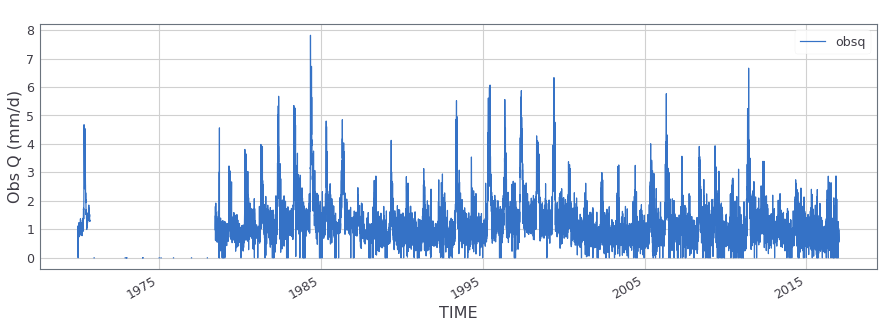

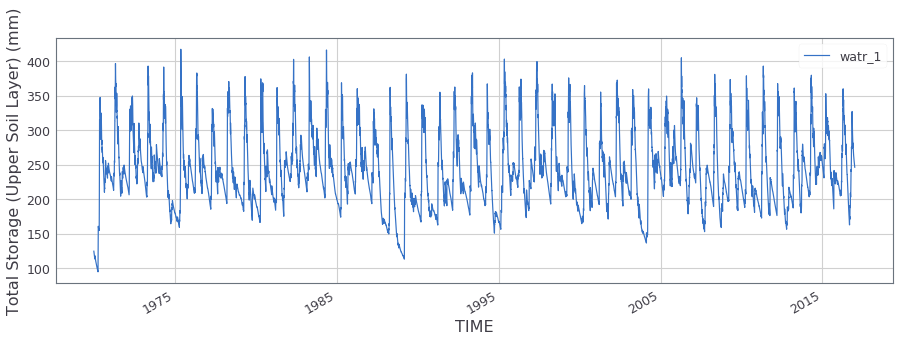

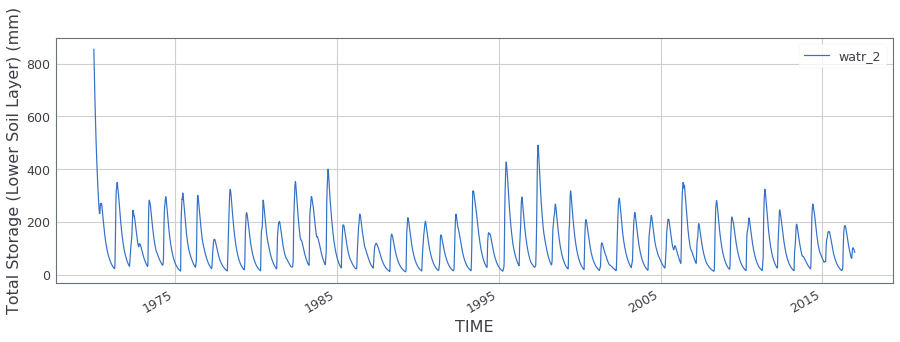

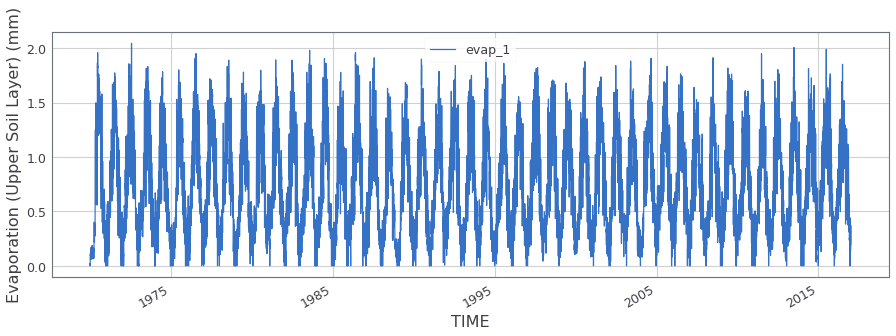

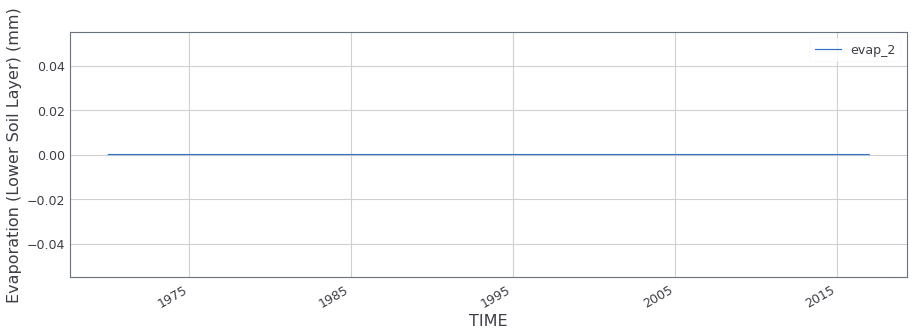

In [4]:
plotncvar(out, 'ppt', 'Precipitation (mm/d)', 'TIME')
plotncvar(out, 'pet', 'PET (mm/d)', 'TIME')
plotncvar(out, 'swe_tot', 'SWE', 'TIME')
plotncvar(out, 'q_instnt', 'Instant Q (mm/d)', 'TIME')
plotncvar(out, 'q_routed', 'Routed Q (mm/d)', 'TIME')
plotncvar(out, 'obsq', 'Obs Q (mm/d)', 'TIME')
plotncvar(out, 'watr_1', 'Total Storage (Upper Soil Layer) (mm)', 'TIME')
plotncvar(out, 'watr_2', 'Total Storage (Lower Soil Layer) (mm)', 'TIME')
plotncvar(out, 'evap_1', 'Evaporation (Upper Soil Layer) (mm)', 'TIME')
plotncvar(out, 'evap_2', 'Evaporation (Lower Soil Layer) (mm)', 'TIME')

# Plot of FUSE Routed flow and Observation

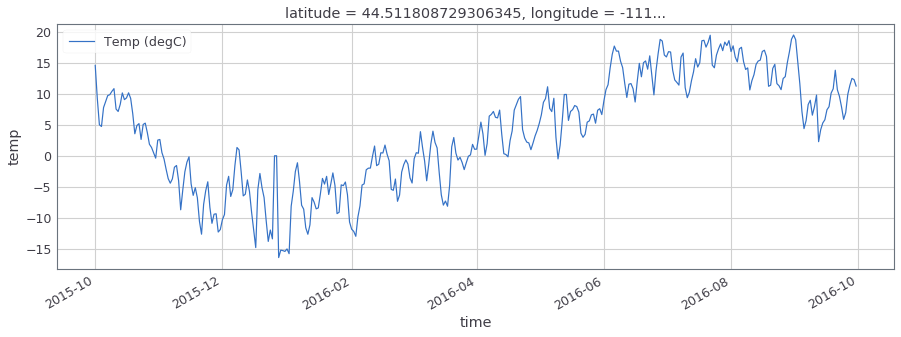

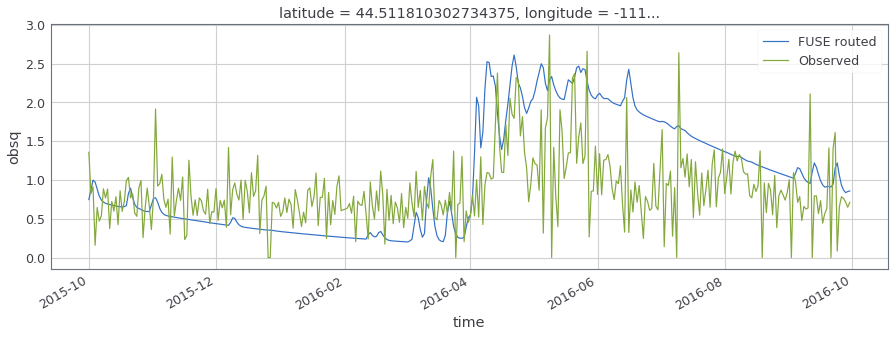

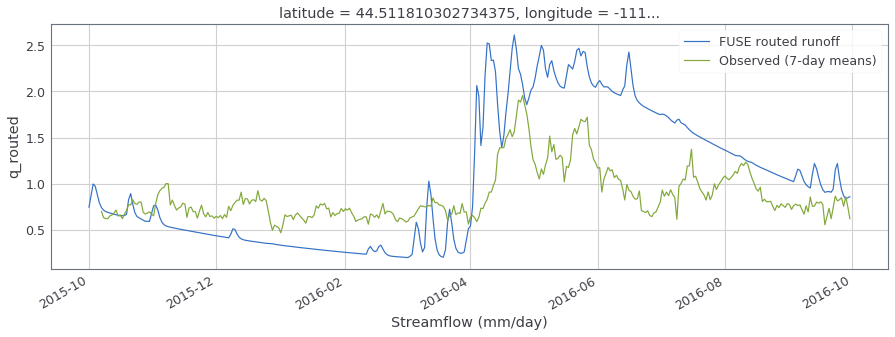

In [5]:
plt.figure(figsize=(15,5))
plt.xlabel('Streamflow (mm/day)')
forc['temp'].loc[starttime: endtime].plot(label = 'Temp (degC)')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
plt.xlabel('Streamflow (mm/day)')
out['q_routed'].loc[starttime: endtime].plot(label = 'FUSE routed')
out['obsq'].loc[starttime: endtime].plot(label = 'Observed')
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
out['q_routed'].loc[starttime: endtime].plot(label = 'FUSE routed runoff')
#unreg.loc[starttime: endtime].plot(label = 'Observed flow (Unregulated)', color = 'blue')
#out2['obsq'].loc[starttime: endtime].plot(label = 'Observed flow (Unregulated monthly means)', color = 'grey')
out['obsq'].loc[starttime: endtime].rolling(time=7).mean().dropna('time').plot(label = 'Observed (7-day means)')
plt.xlabel('Streamflow (mm/day)')
plt.legend()
plt.show()